<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/AirfoilS809_komegaSST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-auth
from google.colab import auth
from google.colab import drive

drive.mount('/content/drive')
# !ls /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create a Model class
class Model(nn.Module):
  def __init__(self,in_features=5, h1 = 61, h2 = 60, out_features=1):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    # self.dropout1 = nn.Dropout(0.05)
    self.fc2 = nn.Linear(h1,h2)
    # self.dropout2 = nn.Dropout(0.05)
    # self.fc3 = nn.Linear(h2,h3)
    # self.dropout3 = nn.Dropout(0.25)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.sigmoid(self.fc1(x))
    # x = self.dropout1(x)
    x = F.sigmoid(self.fc2(x))
    # x = self.dropout2(x)
    # x = F.sigmoid(self.fc3(x))
    # x = self.dropout3(x)
    x = self.out(x)

    return x

torch.manual_seed(42)

model = Model()

In [4]:
# Read the data set -  Airfoil S809
df1 = pd.read_csv("/content/drive/MyDrive/NN_features_for_training/features_10.2.csv")
df2 = pd.read_csv("/content/drive/MyDrive/NN_features_for_training/features_14.2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/NN_features_for_training/features_15.2.csv")
df4 = pd.read_csv("/content/drive/MyDrive/NN_features_for_training/features_20.1.csv")

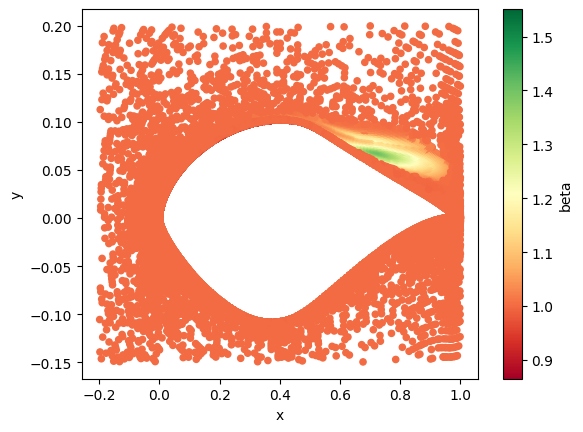

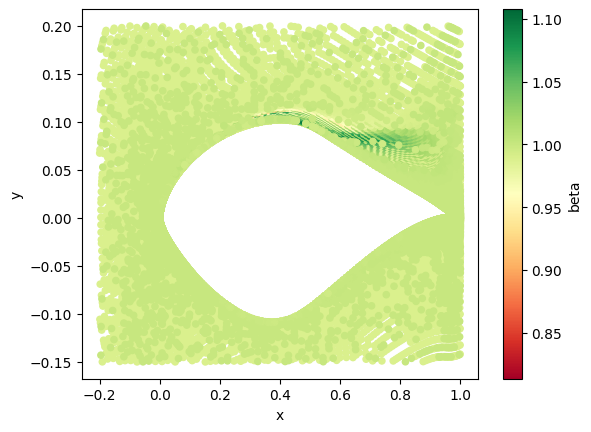

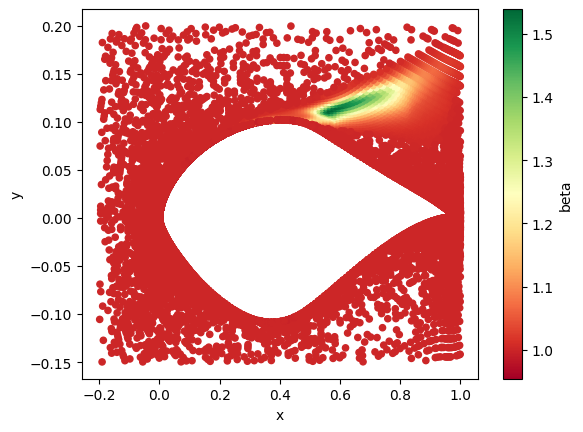

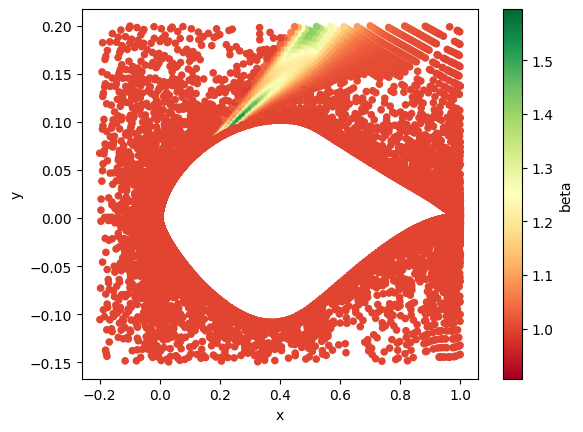

In [5]:
# Combine data
frames = [df1, df2, df3, df4]
ff = []
j = 0
for item in frames:
  j = j+1
  xc = np.array(item['x'])
  yc = np.array(item['y'])
  b = np.array(item['betaFieldInversion'])
  ff1 = np.array(item['ReV'])
  ff2 = np.array(item['ReT'])
  ff3 = np.array(item['SoV'])
  ff4 = np.array(item['lambda'])
  ff5 = np.array(item['PoD'])



  # # Normalize x and y coordinates
  # min_range = -5.0
  # max_range = 5.0
  # xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
  # yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))



  x1,y1,b1,f1,f2,f3,f4,f5,f6 = [[] for i in range(9)]
  # Filter data for the specified range of coordinates
  for i in range(len(xc)):
    if xc[i]>=-0.2 and xc[i]<=1.0:
      if yc[i]>=-0.15 and yc[i]<=0.20:
        x1.append(xc[i])
        y1.append(yc[i])
        b1.append(b[i])
        f1.append(ff1[i])
        f2.append(ff2[i])
        f3.append(ff3[i])
        f4.append(ff4[i])
        f5.append(ff5[i])



  modified_data = {
  'x': np.array(x1),
  'y': np.array(y1),
  'beta': np.array(b1),
  'feature1': np.array(f1),
  'feature2': np.array(f2),
  'feature3': np.array(f3),
  'feature4': np.array(f4),
  'feature5': np.array(f5),
  }




  cf = pd.DataFrame(modified_data)
  # Data for beta>1.005 or beta<0.995
  s1 = cf[(cf['beta'] < 0.995) | (cf['beta'] > 1.005)]
  s2 = cf[(cf['beta'] >= 0.995) & (cf['beta'] <= 1.005)]


  s3 = s2.sample(frac=0.25, random_state=1)
  df_filtered = pd.concat([s1, s3], ignore_index=True)

  # df_filtered.shape[0], s1.shape[0], s2.shape[0], s3.shape[0]

  ax = df_filtered.plot.scatter(x='x',
                      y='y',
                      c='beta',
                      colormap='RdYlGn')

  ff.append(df_filtered)

df = pd.concat(ff)

<Axes: xlabel='feature5', ylabel='Density'>

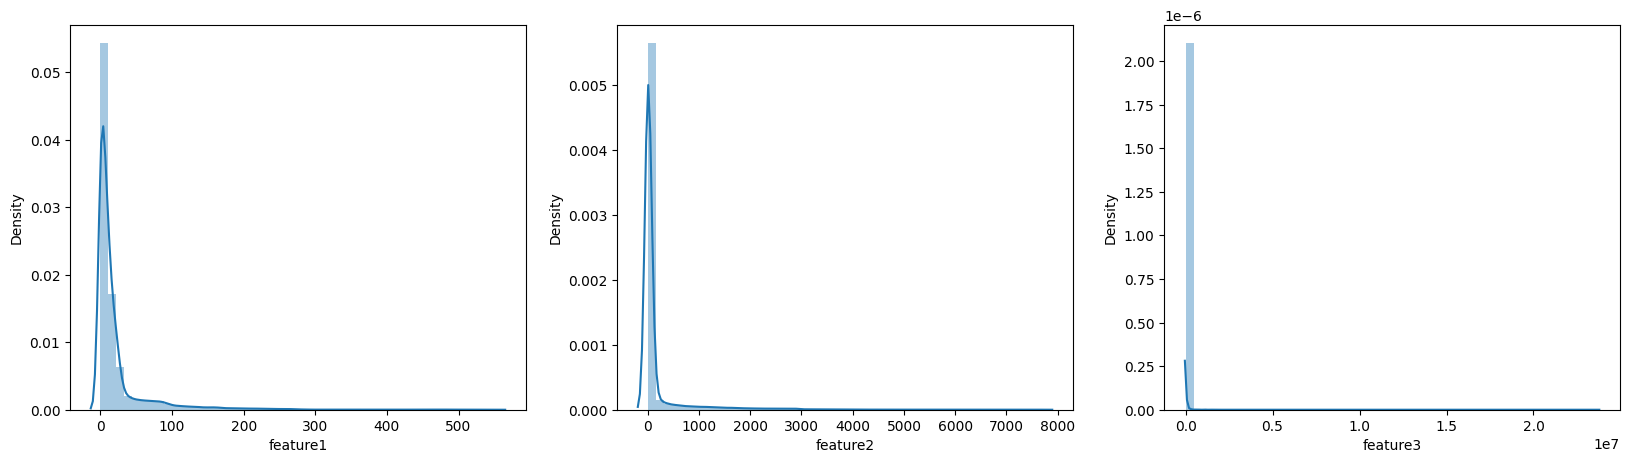

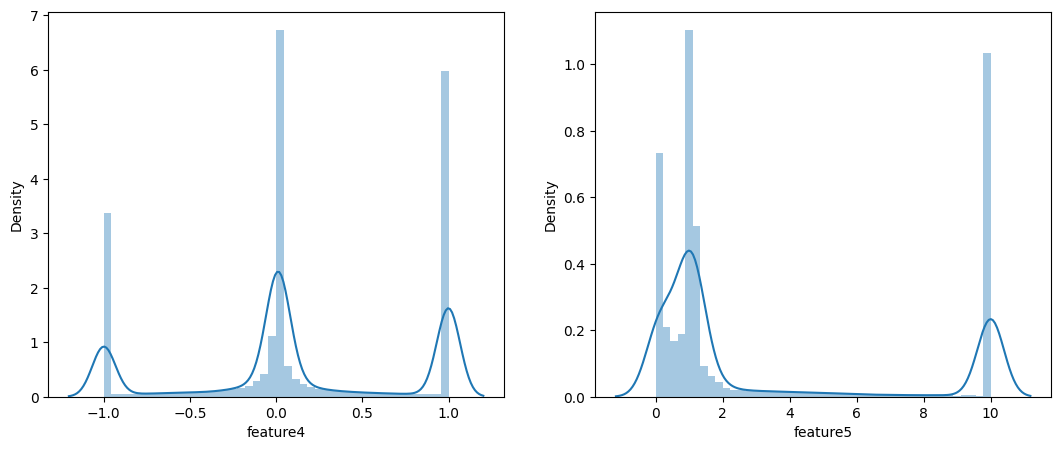

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




df1 = df.drop(['x','y','beta'],axis=1)
df2 = df.drop(['x','y','feature1','feature2','feature3','feature4','feature5'],axis=1)


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df1['feature1'])
plt.subplot(1,3,2)
sns.distplot(df1['feature2'])
plt.subplot(1,3,3)
sns.distplot(df1['feature3'])

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df1['feature4'])
plt.subplot(1,3,2)
sns.distplot(df1['feature5'])
# plt.subplot(1,3,3)
# sns.distplot(df1['feature6'])

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler





# # Fill missing values with the mean
# df1 = df1.fillna(df1.mean())
# m = df1.max()
# df1 = df1.div(m)

# df1.min(),df1.max()
# Standardization
# standard_scaler = StandardScaler()
# min_max_scaler = MinMaxScaler(feature_range=(0, 1))
# # transformer = Normalizer()
# scaler = RobustScaler(with_centering=False)

# Features
# X = min_max_scaler.fit_transform(df1)
X = df1.values

# # Target
# # y = df_filtered['beta'].values
# # y = standard_scaler.fit_transform(df2)
# min_max_scaler = MinMaxScaler(feature_range=(0, 1))
# y = min_max_scaler.fit_transform(df2)
# # y = scaler.fit_transform(df2)
y = df2.values

Beta value distribution:
Range 0.813 - 0.821: 1 samples
Range 0.821 - 0.829: 0 samples
Range 0.829 - 0.837: 0 samples
Range 0.837 - 0.845: 0 samples
Range 0.845 - 0.853: 0 samples
Range 0.853 - 0.860: 0 samples
Range 0.860 - 0.868: 3 samples
Range 0.868 - 0.876: 6 samples
Range 0.876 - 0.884: 11 samples
Range 0.884 - 0.892: 26 samples
Range 0.892 - 0.899: 56 samples
Range 0.899 - 0.907: 61 samples
Range 0.907 - 0.915: 60 samples
Range 0.915 - 0.923: 72 samples
Range 0.923 - 0.931: 135 samples
Range 0.931 - 0.938: 199 samples
Range 0.938 - 0.946: 271 samples
Range 0.946 - 0.954: 486 samples
Range 0.954 - 0.962: 621 samples
Range 0.962 - 0.970: 822 samples
Range 0.970 - 0.978: 1236 samples
Range 0.978 - 0.985: 2918 samples
Range 0.985 - 0.993: 30850 samples
Range 0.993 - 1.001: 48529 samples
Range 1.001 - 1.009: 1667 samples
Range 1.009 - 1.017: 1194 samples
Range 1.017 - 1.024: 741 samples
Range 1.024 - 1.032: 543 samples
Range 1.032 - 1.040: 464 samples
Range 1.040 - 1.048: 438 samples

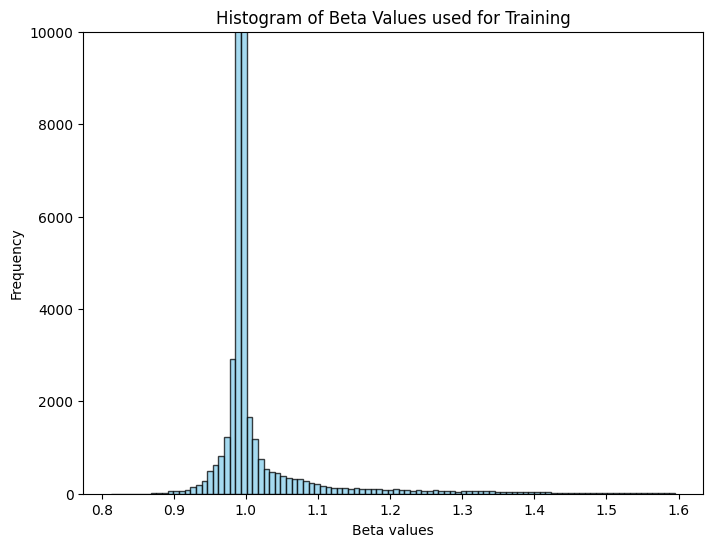

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of bins
num_bins = 100

# Compute the histogram data: counts and bin edges
counts, bin_edges = np.histogram(df['beta'], bins=num_bins)

# Print out the counts for each bin range
print("Beta value distribution:")
for i in range(len(counts)):
    print(f"Range {bin_edges[i]:.3f} - {bin_edges[i+1]:.3f}: {counts[i]} samples")

# Now plot the histogram using matplotlib
plt.figure(figsize=(8,6))
plt.hist(df['beta'], bins=num_bins, color='skyblue', edgecolor='black', alpha=0.75)
plt.xlabel('Beta values')
plt.ylabel('Frequency')
plt.ylim(0,10000)
plt.title('Histogram of Beta Values used for Training')
plt.savefig("Beta_Histogram.png", dpi=300)
plt.show()


In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001,weight_decay=0.0000001)
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001,weight_decay=0.0)

In [ ]:
#5-Fold Cross Validation
from sklearn import metrics

from sklearn.model_selection import KFold
kFold=KFold(n_splits=8,shuffle=True, random_state=100)

# Initialize a list to store the evaluation scores
scores = []
training_cost = []
testing_cost =[]
iterations = 1500
train_fold = [[] for i in range(8)]
test_fold = [[] for i in range(8)]
c = 0
for train_index,test_index in kFold.split(X):
  print("Train Index: ", train_index, "\n")
  print("Test Index: ", test_index)
  print("Size of training data:", len(train_index),"\n")
  print("Size of testing data:", len(test_index),"\n")

  X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]


  X_train = torch.FloatTensor(X_train)
  X_test = torch.FloatTensor(X_test)

  y_train = torch.FloatTensor(y_train)
  y_test = torch.FloatTensor(y_test)


  losses = []
  for i in range(iterations):
    # go forward and predict
    y_pred = model.forward(X_train)

    # Measure the loss
    loss = criterion(y_pred,y_train)

    # Keep track of the losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
      print(f'iter: {i} and loss: {loss}')

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_fold[c].append(y_pred.detach().numpy())
  train_fold[c].append(y_train.detach().numpy())
  training_cost.append(losses)

  # Evaluate Model
  with torch.no_grad():
    y_eval = model.forward(X_test)
    test_loss = criterion(y_eval,y_test)
  test_fold[c].append(y_eval.detach().numpy())
  test_fold[c].append(y_test.detach().numpy())


  testing_cost.append(test_loss)
  scores.append(metrics.mean_squared_error(y_eval,y_test))
  print('MSEloss: {}'.format(testing_cost))
  print('MSE error: {}'.format(scores))

  from sklearn.metrics import r2_score

  r2 = r2_score(y_test,y_eval)
  print(f"R-squared value = {r2}")

  c = c+1

Train Index:  [    0     1     2 ... 96878 96879 96880] 

Test Index:  [    6    22    23 ... 96842 96856 96863]
Size of training data: 84770 

Size of testing data: 12111 

iter: 0 and loss: 1.6835845708847046
iter: 10 and loss: 0.5506126284599304
iter: 20 and loss: 0.07832340151071548
iter: 30 and loss: 0.006348253693431616
iter: 40 and loss: 0.02190636843442917
iter: 50 and loss: 0.011263743042945862
iter: 60 and loss: 0.003899630857631564
iter: 70 and loss: 0.004132652655243874
iter: 80 and loss: 0.0037001853343099356
iter: 90 and loss: 0.0032096204813569784
iter: 100 and loss: 0.0031421207822859287
iter: 110 and loss: 0.003042777767404914
iter: 120 and loss: 0.00296919047832489
iter: 130 and loss: 0.0029163488652557135
iter: 140 and loss: 0.0028650073800235987
iter: 150 and loss: 0.0028198088984936476
iter: 160 and loss: 0.002775268629193306
iter: 170 and loss: 0.002736425492912531
iter: 180 and loss: 0.002714080037549138
iter: 190 and loss: 0.002693072659894824
iter: 200 and loss

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_eval)
print(f"R-squared value = {r2}")


In [ ]:
# Define the coordinates for the diagonal line
a1 = [0.9, 1.7]  # x-coordinates of the line's endpoints
b1 = [0.9, 1.7]  # y-coordinates of the line's endpoints

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(train_fold[0][1],train_fold[0][0], s=5)
plt.plot(a1, b1, color='red')
plt.xlabel(r'$\beta$-truth')
plt.ylabel(r'$\beta$-predicted')
plt.title('Initial Training')


# plt.subplot(1,8,2)
# plt.scatter(train_fold[1][1],train_fold[1][0], s=5)
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Training - Fold2')
# plt.subplot(1,8,3)
# plt.scatter(train_fold[2][1],train_fold[2][0], s=5)
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Training - Fold3')
# plt.subplot(1,8,4)
# plt.scatter(train_fold[3][1],train_fold[3][0], s=5)
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Training - Fold4')
# plt.subplot(1,8,5)
# plt.scatter(train_fold[4][1],train_fold[4][0], s=5)
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Training - Fold5')
# # plt.ylim(-4,2)


# plt.subplot(1,8,6)
# plt.scatter(train_fold[5][1],train_fold[5][0], s=5)
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Training - Fold6')
# # plt.ylim(-4,2)
# plt.subplot(1,8,7)
# plt.scatter(train_fold[6][1],train_fold[6][0], s=5)
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Training - Fold7')
# # plt.ylim(-4,2)
plt.subplot(1,2,2)
plt.scatter(train_fold[4][1],train_fold[4][0], s=5)
plt.plot(a1, b1, color='red')
plt.xlabel(r'$\beta$-truth')
plt.ylabel(r'$\beta$-predicted')
plt.title('Final Training')
# plt.ylim(-4,2)
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(test_fold[0][1],test_fold[0][0],s =5 )
plt.plot(a1, b1, color='red')
plt.xlabel(r'$\beta$-truth')
plt.ylabel(r'$\beta$-predicted')
plt.title('Initial Testing')
# plt.subplot(1,8,2)
# plt.scatter(test_fold[1][1],test_fold[1][0],s =5 )
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Testing- Fold2')
# plt.subplot(1,8,3)
# plt.scatter(test_fold[2][1],test_fold[2][0],s =5 )
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Testing- Fold3')
# plt.subplot(1,8,4)
# plt.scatter(test_fold[3][1],test_fold[3][0],s =5 )
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Testing- Fold4')
# plt.subplot(1,8,5)
# plt.scatter(test_fold[4][1],test_fold[4][0],s =5 )
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Testing- Fold5')

# plt.subplot(1,8,6)
# plt.scatter(test_fold[5][1],test_fold[5][0],s =5 )
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Testing- Fold6')
# plt.subplot(1,8,7)
# plt.scatter(test_fold[6][1],test_fold[6][0],s =5 )
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Testing- Fold7')
plt.subplot(1,2,2)
plt.scatter(test_fold[4][1],test_fold[4][0],s =5 )
plt.plot(a1, b1, color='red')
plt.xlabel(r'$\beta$-truth')
plt.ylabel(r'$\beta$-predicted')
plt.title('Final Testing')

plt.show()

In [ ]:
plt.figure(figsize=(25,8))
plt.subplot(1,5,1)
plt.plot(range(iterations), training_cost[0])
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.title('Fold1')
plt.subplot(1,5,2)
plt.plot(range(iterations), training_cost[1])
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.title('Fold2')
plt.subplot(1,5,3)
plt.plot(range(iterations), training_cost[2])
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.title('Fold3')
plt.subplot(1,5,4)
plt.plot(range(iterations), training_cost[3])
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.title('Fold4')
plt.subplot(1,5,5)
plt.plot(range(iterations), training_cost[4])
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.title('Fold5')
# plt.subplot(1,8,6)
# plt.plot(range(iterations), training_cost[5])
# plt.ylabel("loss/error")
# plt.xlabel('Epoch')
# plt.title('Fold6')
# plt.subplot(1,8,7)
# plt.plot(range(iterations), training_cost[6])
# plt.ylabel("loss/error")
# plt.xlabel('Epoch')
# plt.title('Fold7')
# plt.subplot(1,8,8)
# plt.plot(range(iterations), training_cost[7])
# plt.ylabel("loss/error")
# plt.xlabel('Epoch')
# plt.title('Fold8')